In [53]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

%matplotlib inline

In [6]:
src_dir = "./number_fonts"
CATEGORIES = ["1","2","3","4","5","6","7","8","9"]

training_data = []

input_image_size = (32,32)

def create_training_dataset():
    for class_index,category in enumerate(CATEGORIES):

        number_dir = src_dir + "/number" + category
        for file_name in os.listdir(number_dir):

            img = cv2.imread(number_dir + "/" + file_name,0)
            training_data.append([img,class_index])

create_training_dataset()

print(np.shape(training_data))

(1350, 2)


In [45]:
random.shuffle(training_data)

In [46]:
#train test split

x_train = []
y_train = []
x_test = []
y_test = []

for i in range(len(training_data)*85//100):
    x_train.append(training_data[i][0])
    y_train.append(training_data[i][1])

for i in range(len(training_data)*85//100,len(training_data)):
    x_test.append(training_data[i][0])
    y_test.append(training_data[i][1])

#reshaping for training
x_train = np.array(x_train,np.float32)
x_train = x_train.reshape(x_train.shape[0],input_image_size[0],input_image_size[1],1)
print(x_train.shape)
x_test = np.array(x_test,np.float32)
x_test = x_test.reshape(x_test.shape[0],input_image_size[0],input_image_size[1],1)
print(x_test.shape)
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train,len(CATEGORIES))
y_test = to_categorical(y_test,len(CATEGORIES))
print(y_train.shape)


input_shape = (input_image_size[0],input_image_size[1],1)



(1147, 32, 32, 1)
(203, 32, 32, 1)
(1147, 9)


In [47]:


model =  Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
#model.add(Activation('relu'))
model.add(Dense(len(CATEGORIES),activation="softmax"))

model.compile(loss=categorical_crossentropy,optimizer=Adadelta(),metrics=["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)             

In [49]:
model_history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(x_test,y_test)
)
score = model.evaluate(x_test,y_test,verbose=0)

Epoch 1/100
36/36 [==============================] - 2s 65ms/step - loss: 1.5618 - accuracy: 0.7219 - val_loss: 1.5246 - val_accuracy: 0.8621
Epoch 2/100
36/36 [==============================] - 2s 64ms/step - loss: 1.5478 - accuracy: 0.7175 - val_loss: 1.5028 - val_accuracy: 0.8670
Epoch 3/100
36/36 [==============================] - 2s 65ms/step - loss: 1.5232 - accuracy: 0.7463 - val_loss: 1.4809 - val_accuracy: 0.8670
Epoch 4/100
36/36 [==============================] - 2s 65ms/step - loss: 1.5115 - accuracy: 0.7158 - val_loss: 1.4594 - val_accuracy: 0.8768
Epoch 5/100
36/36 [==============================] - 2s 65ms/step - loss: 1.4801 - accuracy: 0.7402 - val_loss: 1.4373 - val_accuracy: 0.8768
Epoch 6/100
36/36 [==============================] - 2s 65ms/step - loss: 1.4569 - accuracy: 0.7550 - val_loss: 1.4153 - val_accuracy: 0.8916
Epoch 7/100
36/36 [==============================] - 2s 65ms/step - loss: 1.4399 - accuracy: 0.7655 - val_loss: 1.3933 - val_accuracy: 0.9015
Epoch 

In [56]:
#save model to disk
model.save_weights('sudoku_number_model.h5')

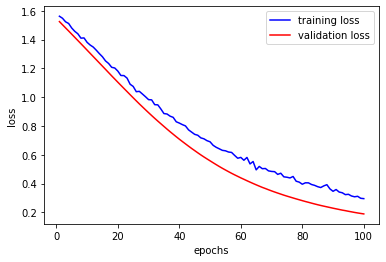

In [55]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,"b",label="training loss")
plt.plot(epochs,val_loss,"r",label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

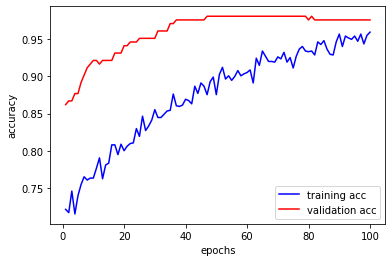

In [57]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs,acc,"b",label="training acc")
plt.plot(epochs,val_acc,"r",label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

(1, 32, 32, 1)
[[0.00549771 0.00358919 0.02729079 0.00520563 0.64608604 0.23261465
  0.00544584 0.05225812 0.02201205]]
5


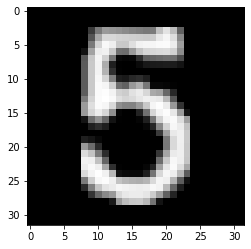

In [136]:
#img_test = cv2.imread("./number_fonts/number3/img3_00357.png",0)
img_test = cv2.imread("./no9.png",0)
plt.imshow(img_test,cmap="gray")

new_img = img_test.reshape(-1,32,32,1)
new_img = new_img.astype("float32")
new_img = new_img/255
print(new_img.shape)

prediction = model.predict([new_img])
print(prediction)
print(np.argmax(prediction[0])+1)